In [1]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
# Font type
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

label_font_size = 10
tick_font_size = 10
legend_font_size = 10

interval = 0
width_glb = 0.8
width_glb2 = 0.15
fig_w = 3
fig_h = 1.5
plot_adjust = [0.22, 0.15, 1, 1, None, None]

# The name of our designed algorithm
our_design = "io_alert"

colour_dict = {"performance": "slategrey", 
        "powersave": "forestgreen", 
        "schedutil": "lightblue", 
        "ondemand": "lightcoral",
        our_design: "honeydew"
       }


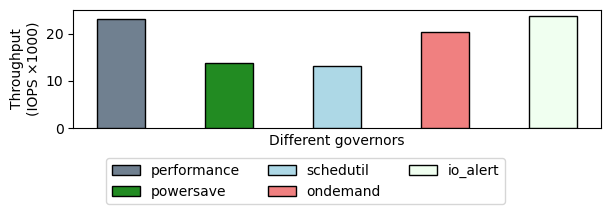

In [3]:
IOPS = [23.2, 13.8, 13.2, 20.3, 23.9]

labels = ["performance", "powersave", "schedutil", "ondemand", our_design]
width = width_glb / 1.8
y = IOPS
colours = [colour_dict[i] for i in labels]

fig, ax = plt.subplots(figsize=(6, 2))
x = np.arange(len(y))
l = plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(plot_adjust[0], plot_adjust[1], plot_adjust[2], plot_adjust[3], plot_adjust[4], plot_adjust[5])
plt.subplots_adjust(0.11, 0.4, 0.99, 0.99, None, None)

# plt.legend(l, labels)
plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("Throughput\n(IOPS ×1000)", fontsize = label_font_size)

fig.legend(l, labels , ncol = 3, fontsize = legend_font_size, loc = "lower center")

figname = "./figs/pmem-IOPS.pdf"
plt.savefig(figname)


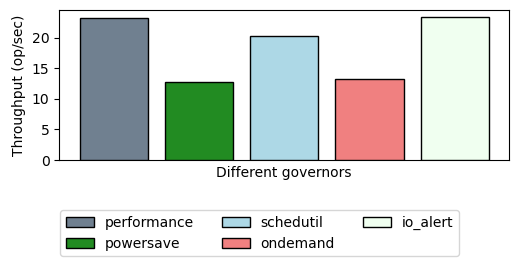

In [4]:
IOPS = [23.2, 12.8,  20.3, 13.2, 23.4] 


labels = ["performance", "powersave", "schedutil", "ondemand", our_design] 

interval = 0
y = IOPS

colours = [colour_dict[i] for i in labels]

width = width_glb
fig, ax = plt.subplots(figsize=(6, 2.5))
x = np.arange(len(y))
l = plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(0.25, 0.4, 1, 1, None, None)

plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("Throughput (op/sec)", fontsize = label_font_size)

fig.legend(l, labels , ncol = 3, fontsize = legend_font_size, loc = "lower center" )
figname = "./figs/legend.pdf"
plt.savefig(figname)


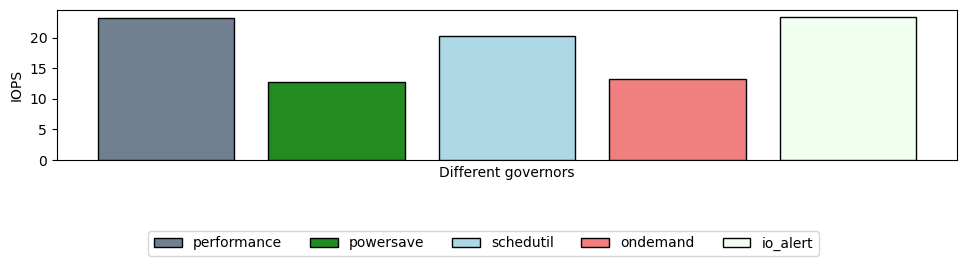

In [5]:
IOPS = [23.2, 12.8,  20.3, 13.2,  23.4]

labels = ["performance", "powersave", "schedutil", "ondemand", our_design]

interval = 0
y = IOPS

colours = [colour_dict[i] for i in labels]

width = width_glb
fig, ax = plt.subplots(figsize=(12, 2.5))
x = np.arange(len(y))
l = plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(0.25, 0.4, 1, 1, None, None)
# plt.legend(l, labels)
plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("IOPS", fontsize = label_font_size)

fig.legend(l, labels , ncol = 6, fontsize = legend_font_size, loc = "lower center" )
figname = "./figs/legend2.pdf"
plt.savefig(figname)

119 server, ramdisk test 

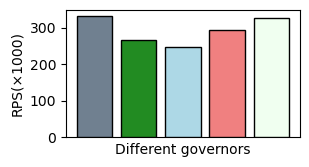

In [6]:
redis_rps = np.array([331978.88, 265289.97, 246265.38,294568.16, 326455.32])/1000
labels = ["performance", "powersave", "schedutil", "ondemand", our_design]
y = redis_rps
colours = [colour_dict[i] for i in labels]
# edgecolours = [i[2] for i in bar_setting][: len(y)]
width = width_glb
fig, ax = plt.subplots(figsize=(fig_w, fig_h))
x = np.arange(len(y))
plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(plot_adjust[0], plot_adjust[1], plot_adjust[2], plot_adjust[3], plot_adjust[4], plot_adjust[5])
plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("RPS(×1000)", fontsize = label_font_size)
figname = "./figs/redis_rps.pdf"
plt.savefig(figname)

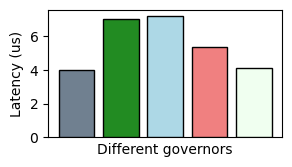

In [7]:
redis_latency = np.array([4.015, 7.031, 7.215, 5.391, 4.138])
labels = ["performance", "powersave", "schedutil", "ondemand", our_design] 
y = redis_latency 
colours = [colour_dict[i] for i in labels]
width = width_glb
fig, ax = plt.subplots(figsize=(fig_w, fig_h))
x = np.arange(len(y))
plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(plot_adjust[0], plot_adjust[1], plot_adjust[2], plot_adjust[3], plot_adjust[4], plot_adjust[5])
plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("Latency (us)", fontsize = label_font_size)
figname = "./figs/redis_latency.pdf"
plt.savefig(figname)

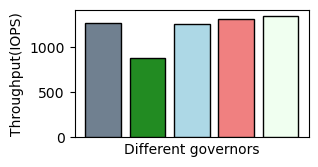

In [8]:
fio_sync_IOPS = [1266, 880, 1261, 1310, 1344]
labels = ["performance", "powersave", "schedutil", "ondemand", our_design]
y = fio_sync_IOPS
colours = [colour_dict[i] for i in labels]
width = width_glb
fig, ax = plt.subplots(figsize=(fig_w, fig_h))
x = np.arange(len(y))
plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(plot_adjust[0], plot_adjust[1], plot_adjust[2], plot_adjust[3], plot_adjust[4], plot_adjust[5])
plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("Throughput(IOPS)", fontsize = label_font_size)
figname = "./figs/fio_sync_IOPS.pdf"
plt.savefig(figname)

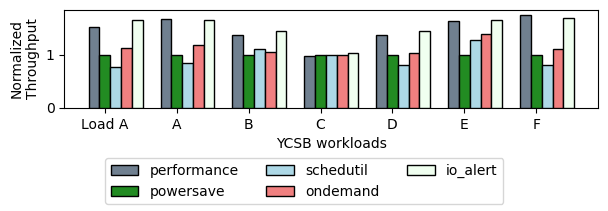

In [9]:
powersave_OPS = np.array([804.269, 1542.41, 11954.1, 118924, 13914.7, 247.518, 1478.58])
performance_OPS = np.array([1225.74, 2593.72, 16395.9, 116837, 19074.3, 404.7, 2594.51])
schedutil_OPS = np.array([615.91, 1298.15, 13350.62, 119121, 11343.69, 315.93, 1194.754])
ondemand_OPS = np.array([902.354, 1835.615, 12542.815, 117532, 14256.7, 342.965, 1632.5])
our_OPS = np.array([1330.86, 2546.81, 17358.4, 123051, 20052.6, 410.2, 2502.37])

y1 = performance_OPS/ powersave_OPS
y2 = powersave_OPS / powersave_OPS
y3 = schedutil_OPS / powersave_OPS
y4 = ondemand_OPS / powersave_OPS
y5 = our_OPS / powersave_OPS
workloads = ["Load A","A","B","C","D","E","F"]
fig, ax = plt.subplots(figsize=(6, 2))
width = width_glb2
labels = ["performance", "powersave", "schedutil", "ondemand", our_design]
colours = [colour_dict[i] for i in labels]
x = np.arange(len(workloads))
ln_powersave = plt.bar(x - width, y1, width = width, color = colour_dict[labels[0]], zorder = 10, edgecolor = 'k')
ln_performance = plt.bar(x, y2, width = width, color = colour_dict[labels[1]], zorder = 10, edgecolor = 'k')
ln_schedutil = plt.bar(x + width, y3, width = width, color = colour_dict[labels[2]], zorder = 10, edgecolor = 'k')
ln_ondemand = plt.bar(x + 2 * width, y4, width = width, color = colour_dict[labels[3]], zorder = 10, edgecolor = 'k')
ln_our = plt.bar(x + 3 * width, y5, width = width, color = colour_dict[labels[4]], zorder = 10, edgecolor = 'k')
plt.xticks(x, workloads , fontsize = tick_font_size )

plt.subplots_adjust(0.1, 0.5, 0.99, 0.99, None, None)

plt.xlabel("YCSB workloads", fontsize = label_font_size)
plt.ylabel("Normalized\nThroughput", fontsize = label_font_size)

fig.legend([ln_powersave, ln_performance, ln_schedutil, ln_ondemand, ln_our], labels , ncol = 3, fontsize = legend_font_size, loc = "lower center") # bbox_to_anchor = (0.5, -0.03),
figname = "./figs/sqlite-ycsb.pdf"
plt.savefig(figname)

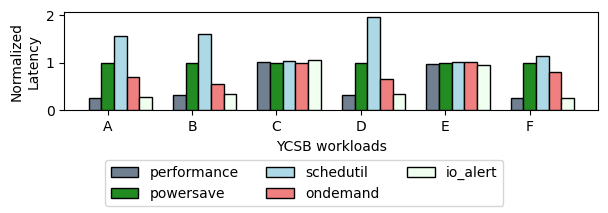

In [10]:
performance_lat = np.array([33.89, 23.89, 9.43, 19.71, 388.61, 32.8])
powersave_lat = np.array([131.33, 75.07, 9.35, 60.9, 398.59, 129.02])
scheutil_lat =  np.array([205.4, 119.94, 9.67, 119.81, 402.3, 147.58])
ondemand_lat = np.array([90.21, 40.28, 9.25, 40.23, 399.25, 102.7])
our_lat = np.array([35.21, 24.82, 9.89, 20.54, 380.1, 33.7])

labels = ["performance", "powersave", "schedutil", "ondemand", our_design] 
colours = [colour_dict[i] for i in labels]
y1 = performance_lat / powersave_lat
y2 = powersave_lat / powersave_lat
y3 = scheutil_lat / powersave_lat
y4 = ondemand_lat / powersave_lat
y5 = our_lat /  powersave_lat
width = width_glb2
workloads = ["A", "B", "C", "D", "E", "F"]

fig, ax = plt.subplots(figsize=(6, 2))

x = np.arange(len(workloads))
ln_performance = plt.bar(x - width, y1, width = width, color = colour_dict[labels[0]], zorder = 10, edgecolor = 'k') 
ln_powersave = plt.bar(x, y2, width = width, color = colour_dict[labels[1]], zorder = 10, edgecolor = 'k') 
ln_schedutil = plt.bar(x + width, y3, width = width, color = colour_dict[labels[2]], zorder = 10, edgecolor = 'k') 
ln_ondemand = plt.bar(x + width * 2, y4, width = width, color = colour_dict[labels[3]], zorder = 10, edgecolor = 'k')
ln_our = plt.bar(x + width * 3, y5, width = width, color = colour_dict[labels[4]], zorder = 10, edgecolor = 'k')
plt.xticks(x, workloads , fontsize = tick_font_size )

plt.subplots_adjust(0.1, 0.5,0.99, 0.99, None, None)

plt.xlabel("YCSB workloads", fontsize = label_font_size)
plt.ylabel("Normalized\nLatency", fontsize = label_font_size)

fig.legend([ln_performance, ln_powersave, ln_schedutil, ln_ondemand, ln_our], labels , ncol = 3, fontsize = legend_font_size, loc = "lower center" ) 
figname = "./figs/sqlite-ycsb-99p-read.pdf"
plt.savefig(figname)

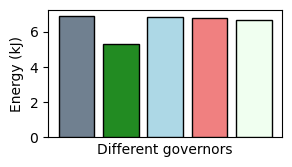

In [11]:
PKG_energy = np.array([6903.875244, 5292.685181, 6871.733032, 6772.490173, 6672.394714]) / 1000

y = PKG_energy
labels = ["performance", "powersave", "schedutil", "ondemand", our_design] 
width = width_glb
fig, ax = plt.subplots(figsize=(fig_w, fig_h))
x = np.arange(len(y))
plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(plot_adjust[0], plot_adjust[1], plot_adjust[2], plot_adjust[3], plot_adjust[4], plot_adjust[5])
plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("Energy (kJ)", fontsize = label_font_size)
figname = "./figs/M2_PKG_energy.pdf"
plt.savefig(figname)

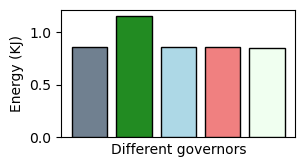

In [12]:
DRAM_energy =  np.array([863.1420898, 1155.067932, 858.9840698, 859.9172363, 852.9424438]) / 1000 
y = DRAM_energy
labels = ["performance", "powersave", "schedutil", "ondemand", our_design] 
width = width_glb
fig, ax = plt.subplots(figsize=(fig_w, fig_h))
x = np.arange(len(y))
plt.bar(x, y, width = width, color = colours, zorder = 10, edgecolor = 'k')
plt.xticks([], fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(plot_adjust[0], plot_adjust[1], plot_adjust[2], plot_adjust[3], plot_adjust[4], plot_adjust[5])
plt.xlabel("Different governors", fontsize = label_font_size)
plt.ylabel("Energy (KJ)", fontsize = label_font_size)
figname = "./figs/M2_DRAM_energy.pdf"
plt.savefig(figname)